<a href="https://colab.research.google.com/github/Matinsalami/DataScience/blob/main/Hands_on_Machine_Learning/Chapter_5/Support%20Vector%20Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM is one of the most popular and powerful models used in linear, nonlinear classification, regression, and even outlier detection.
It is usually used in small, medium-sized datasets.

# Linear SVM classification

You can think of an SVM classifier as fitting the widest possible street between the classes in a dataset. This is called **large margin classification**.

We have two type of line in Linear SVM. A solid line which is a decision boundary of the SVM. And two dashed lines which represent the margins of the classifier. The margins are determined by the instances located on the edge of the street which are called **support vectors**.

SVMs are sensative to feature scaling. So we should do the feature scaling for all  features.

## Soft Margin Classification

If e strictly impose that all the instances of the street this is called **hard margin classification**. This model is sensative to outliers and it only works with data which are linearly separable.

Instead we can use a more flexible model so that we have a relatively large street and limiting the margin violations. This is called **soft margin classification**.

in Scikit-Learn we have a C hyperparameter which controls the wideness of the street. Smaller values of C leads to wider street and having more margin violations(A more generalized model). With larger values for C, we have a more strict model which is sensative to margin violation and outliers.

If a model is overfitting we can try regularize it by reducing C hyperparameter.



In [1]:
# We use SVM Linear to train on iris-dataset

import numpy as np
from sklearn import datasets
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # petal length, petal width
y = (iris["target"] == 2 ).astype(np.float64)

svm_clf = Pipeline([("scalar", StandardScaler()), ("linear_svc",LinearSVC(C=1, loss="hinge"))])

svm_clf.fit(X, y)

Pipeline(steps=[('scalar', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
# Unlike Logistic Regression classifiers, SVM classifiers do not output probabilities for each class.
svm_clf.predict([[5.5 , 1.7]])

array([1.])

We have two other models. First is using SVC(kernel="linear", C=1), but is not recommended as it is much slower with large training sets. Second one is SGDClassifier with SGDClassifier(loss="hinge", alpha=1/(m*C)). This applies Stochastic Gradient Descent and is useful especially with huge datasets or to handle online classifiaction tasks.

# Nonlinear SVM classification

Linear SVM classifiers can be efficient and work surprisingly well im many cases, but some datasets are not even close to being linearly separable.

One approach is to add more features like in polynomial regression. 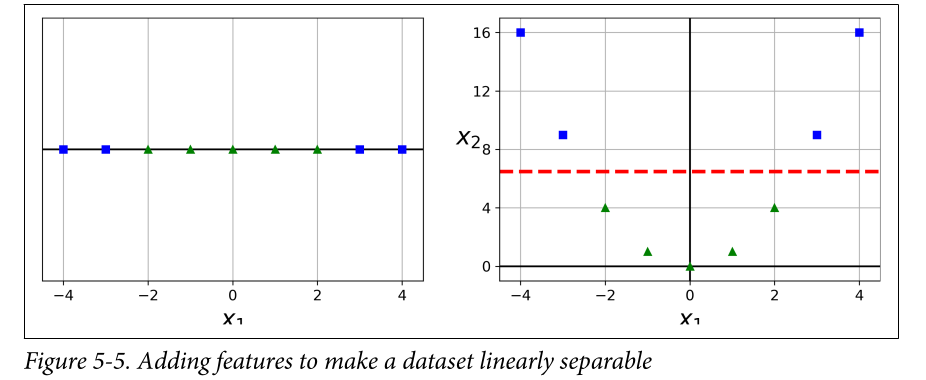

In [3]:
# Let's implement it with scikit-learn

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)),("scalar", StandardScaler()), ("svm_clf", LinearSVC(C=10, loss="hinge"))])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scalar', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

## Polynomial Kernel



adding polynomial features is great for dealing with all sorts of ML algorithms not just SVMs. But at a low polynomial degree it cannot deal with very complex datasets. And with a high polynomial degree it creates a huge number of features, making the model too slow. Instead we use a trick called Kernel trick.

In [4]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([("scalar", StandardScaler()), ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])
# The model uses polynomial kernel with a non-linear decision boundary with 3rd degree.
# coef0 controls how much influence higher-degree terms have
# C is the regularization parameter (higher means less regularized, tighter fit)
# If the model is overfitting, we can try reducing the polynomial degree. If it is underfitting we can try increasing it.

In [5]:
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scalar', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

## Adding Similarity Features

Another rechnique to tackle nonlinear problems is to add features computed using a *similarity function* that measures how much each instance resembles a particular *landmark*. Here we introduce a similarity function called *Radial Basis Function* or RBF.

$\phi_{\gamma}(\mathbf{x}, \boldsymbol{\ell}) = \exp\left(-\gamma \|\mathbf{x} - \boldsymbol{\ell}\|^2\right)
$

In the formula $\left(\|\mathbf{x} - \boldsymbol{\ell}\|^2\right)$ is the distance between the landmark and the instance. $\gamma$ controls how sharply the similarity drops off with distance.

It is basiclly a bell-shaped function varying from 0(very far from the landmark) to 1 which is exactly thr landmark. The best way to find a good landmark is to have a landmark at each instance in the data. However this approach set m instances and n features.

##Gaussian RBF Kernel

In [6]:
rbf_kernel_svm_clf = Pipeline([("scalar", StandardScaler()),("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))])

rbf_kernel_svm_clf.fit(X,y)
# Here we used an SVM classifier with kernel RBF. In which we used the hyperparameters gamma=5 which determines how tight the data fit to the model.
# The bigger the size of gamma the more it is regularized.
# So if the model is overfitting we should try to reduce it and if the model is underfitting we should try to increase it.
#C focuses on how to handle errors (bias vs variance).
#Gamma focuses on the shape of the decision boundary.

Pipeline(steps=[('scalar', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Now let's see when to use which SVM model and why.

As a rule of thumb, we use linear kernel first(*LinearSVC* class) which is much faster than *SVC(kernel="linear")* especilly when the data is large or if it has plenty of features.

If the data is not that large we can try Gaussian RBF kernel as well.

# SVM Regression

The SVM algorithms is quite versatile. We can use it in linear and nonlinear Regression. SVM Regression tries to fit as many instances as possible on the street while limiting margin violations.

The width of the street is controlled by a hyperparameter $ϵ$. The bigger $ϵ$, the wider the margin and vice versa.

If we add more instances in the margin we see no difference. In other words, the model is $ϵ$-sensetive.

In [9]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

To tackle nonlinear regression tasks, you can use kernelized SVM model. For example using a 2nd degree polynomial kernel. There is a little regularization on the left plot as we have a large value for C. 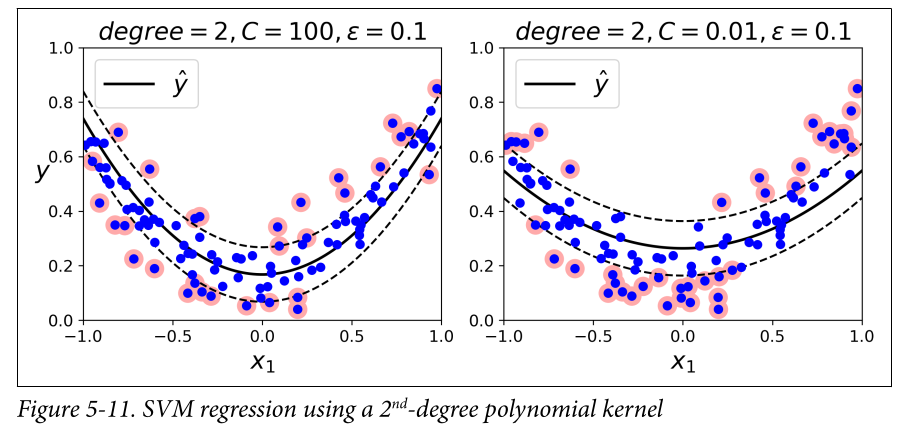

In [15]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100,epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')